In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import pytz
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


# data cleaning

In [ ]:
ddosdata = pd.read_csv('APA-DDoS-Dataset.csv')
ddosdata

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.923006000 Mountain Dayli...,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.935672000 Mountain Dayli...,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.957469000 Mountain Dayli...,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.970971000 Mountain Dayli...,10,1175,6,560,4,615,Benign


In [ ]:
ddosdata.shape

(151200, 23)

In [ ]:
ddosdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151200 entries, 0 to 151199
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip.src           151200 non-null  object
 1   ip.dst           151200 non-null  object
 2   tcp.srcport      151200 non-null  int64 
 3   tcp.dstport      151200 non-null  int64 
 4   ip.proto         151200 non-null  int64 
 5   frame.len        151200 non-null  int64 
 6   tcp.flags.syn    151200 non-null  int64 
 7   tcp.flags.reset  151200 non-null  int64 
 8   tcp.flags.push   151200 non-null  int64 
 9   tcp.flags.ack    151200 non-null  int64 
 10  ip.flags.mf      151200 non-null  int64 
 11  ip.flags.df      151200 non-null  int64 
 12  ip.flags.rb      151200 non-null  int64 
 13  tcp.seq          151200 non-null  int64 
 14  tcp.ack          151200 non-null  int64 
 15  frame.time       151200 non-null  object
 16  Packets          151200 non-null  int64 
 17  Bytes     

convertir frame.time to datetime type

In [ ]:
ddosdata['frame.time'][0]

' 16-Jun 2020 20:18:15.071112000 Mountain Daylight Time'

In [ ]:
notMountain=[(str(i).find('Mountain Daylight Time') == -1) for i in ddosdata['frame.time']]
ddosdata[notMountain]

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label


In [ ]:
ddosdata

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.923006000 Mountain Dayli...,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.935672000 Mountain Dayli...,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.957469000 Mountain Dayli...,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.970971000 Mountain Dayli...,10,1175,6,560,4,615,Benign


In [ ]:
ddosdata.dropna(subset=['frame.time'], inplace=True)

In [ ]:
ddosdata['frame.time'] = ddosdata['frame.time'].str.replace(' Mountain Daylight Time', '')

In [ ]:
ddosdata['frame.time'][0]

' 16-Jun 2020 20:18:15.071112000'

In [ ]:
def is_not_valid_datetime(date_string, format):
    try:
        pd.to_datetime(date_string, format=format)
        return False
    except ValueError:
        return True

not_valid_dates = [is_not_valid_datetime(date, ' %d-%b %Y %H:%M:%S.%f') for date in ddosdata['frame.time']]


In [ ]:
ddosdata['frame.time'][not_valid_dates]

64         16-Jun 2020 20:18:15.07416-Jun 202000
1245       16-Jun 2020 20:18:15.10016-Jun 202000
1511       16-Jun 2020 20:18:15.10316-Jun 202000
2584       16-Jun 2020 20:18:15.116-Jun 20208000
2844       16-Jun 2020 20:18:15.12416-Jun 202000
                           ...                  
146199     16-Jun 2020 22:09:13.11716-Jun 202000
146463     16-Jun 2020 22:09:19.51216-Jun 202000
147732     16-Jun 2020 22:09:42.05816-Jun 202000
149080     16-Jun 2020 22:10:11.81816-Jun 202000
151123     16-Jun 2020 22:10:45.8316-Jun 2020000
Name: frame.time, Length: 195, dtype: object

In [ ]:
ddosdata['frame.time']=ddosdata['frame.time'].apply(lambda x: re.sub(r'\..*', '',x ))


In [ ]:
ddosdata['frame.time']

0          16-Jun 2020 20:18:15
1          16-Jun 2020 20:18:15
2          16-Jun 2020 20:18:15
3          16-Jun 2020 20:18:15
4          16-Jun 2020 20:18:15
                  ...          
151195     16-Jun 2020 22:10:46
151196     16-Jun 2020 22:10:46
151197     16-Jun 2020 22:10:46
151198     16-Jun 2020 22:10:46
151199     16-Jun 2020 22:10:46
Name: frame.time, Length: 151200, dtype: object

In [ ]:
ddosdata['frame.time'] = pd.to_datetime(ddosdata['frame.time'], format=' %d-%b %Y %H:%M:%S')
# set the timezone to Mountain Daylight Time (MDT)
ddosdata['frame.time'] = ddosdata['frame.time'].dt.tz_localize('UTC').dt.tz_convert('US/Mountain')

In [ ]:
ddosdata.sort_values('frame.time', inplace=True)

In [ ]:
ddosdata.isnull().sum()

ip.src             0
ip.dst             0
tcp.srcport        0
tcp.dstport        0
ip.proto           0
frame.len          0
tcp.flags.syn      0
tcp.flags.reset    0
tcp.flags.push     0
tcp.flags.ack      0
ip.flags.mf        0
ip.flags.df        0
ip.flags.rb        0
tcp.seq            0
tcp.ack            0
frame.time         0
Packets            0
Bytes              0
Tx Packets         0
Tx Bytes           0
Rx Packets         0
Rx Bytes           0
Label              0
dtype: int64

# EDA



*  ip.src: Source IP address
*  tcp.srcport: Source port number for TCP (Transmission Control Protocol).
* tcp.dstport: Destination port number for TCP.
* ip.proto: IP protocol used (e.g., TCP, UDP).
* frame.len: Length of the network frame.
* tcp.flags.syn: TCP SYN flag.
* tcp.flags.reset: TCP RST flag.
* tcp.flags.push: TCP PUSH flag.
* tcp.flags.ack: TCP ACK flag.
* ip.flags.mf: IP More Fragments flag.
* ip.flags.df: IP Do Not Fragment flag.
* ip.flags.rb: Reserved bits in the IP header.
* tcp.seq: TCP sequence number.
* tcp.ack: TCP acknowledgment number.
* frame.time: Timestamp of the network frame.
* Packets: Number of packets in the network frame.
* Bytes: Number of bytes in the network frame.
* Tx Packets: Number of transmitted packets.
* Tx Bytes: Number of transmitted bytes.
* Rx Packets: Number of received packets.
* Rx Bytes: Number of received bytes.
* Label: The label or category assigned to the network event (e.g., 'DDoS-PSH-ACK', 'Benign', 'DDoS-ACK').





1.   Benign: un trafic non malveillant
2.   DDoS-PSH-ACK (Push-ACK Flood):les paquets TCP envoyés avec Le flag PSH et flag ACK confirme la réception de données, Donc surcharger les ressources du système cible.
*   un segment TCP avec le flag PSH activé, il envoie immédiatement les données au niveau de l'application plutôt que de les stocker temporairement dans un tampon pour former un message complet.
3.  DDoS-ACK (ACK Flood): des paquets ACK de manière excessive, saturant ainsi la bande passante du système cible.






In [ ]:
import matplotlib.pyplot as plt


In [ ]:
begign=ddosdata[ddosdata['Label']=="Bengin"].Packets
ddos_ack=ddosdata[ddosdata['Label']=="DDoS-ACK"].Packets
ddos_psh_ack=ddosdata[ddosdata['Label']=="DDoS-PSH-ACK"].Packets

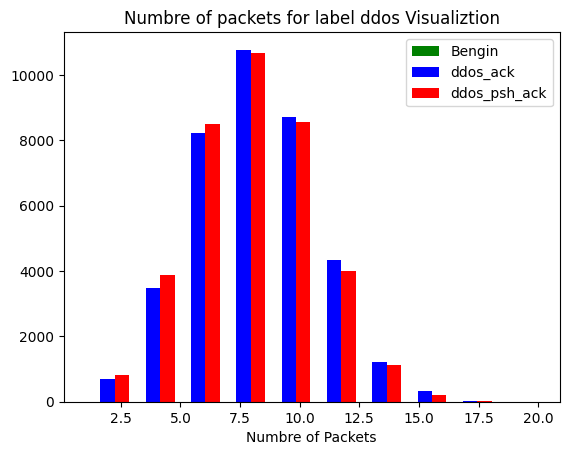

In [ ]:

plt.xlabel("Numbre of Packets")
plt.ylabel("")
plt.title("Numbre of packets for label ddos Visualiztion")
plt.hist([begign, ddos_ack,ddos_psh_ack], rwidth=0.95, color=['green','blue','red'],label=['Bengin','ddos_ack','ddos_psh_ack'])
plt.legend()

In [ ]:
label_counts = ddosdata.groupby(['frame.time','Label']).size().unstack(fill_value=0)
label_counts.columns

Index(['Benign', 'DDoS-ACK', 'DDoS-PSH-ACK'], dtype='object', name='Label')

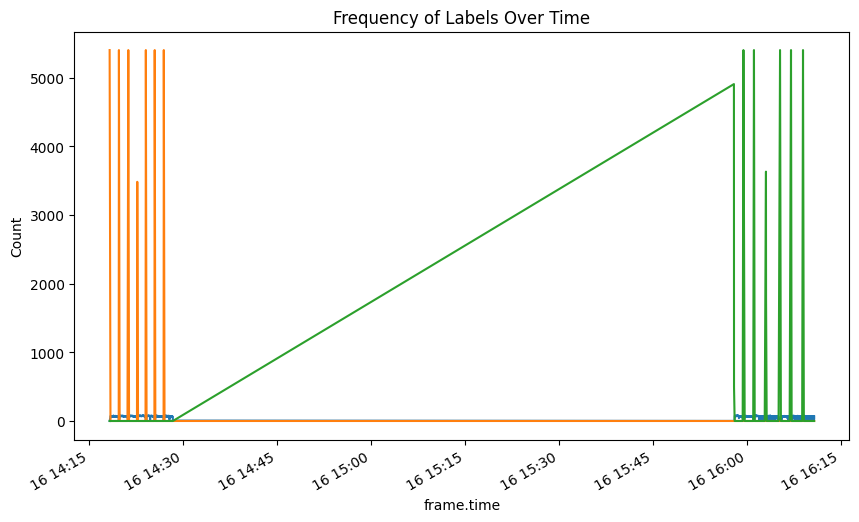

In [ ]:

label_counts['Benign'].plot(kind='line', figsize=(10, 6))
label_counts['DDoS-PSH-ACK'].plot(kind='line', figsize=(10, 6))
label_counts['DDoS-ACK'].plot(kind='line', figsize=(10, 6))

plt.title('Frequency of Labels Over Time')
plt.ylabel('Count')
plt.show()

on remarque que pour benign(activite normale) on a count d'envoi est bas,

# feature engeneering

In [ ]:
ddosdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151200 entries, 0 to 151199
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype                      
---  ------           --------------   -----                      
 0   ip.src           151200 non-null  object                     
 1   ip.dst           151200 non-null  object                     
 2   tcp.srcport      151200 non-null  int64                      
 3   tcp.dstport      151200 non-null  int64                      
 4   ip.proto         151200 non-null  int64                      
 5   frame.len        151200 non-null  int64                      
 6   tcp.flags.syn    151200 non-null  int64                      
 7   tcp.flags.reset  151200 non-null  int64                      
 8   tcp.flags.push   151200 non-null  int64                      
 9   tcp.flags.ack    151200 non-null  int64                      
 10  ip.flags.mf      151200 non-null  int64                      
 11  ip.flags.df  

utiliser label encoder pour les address ip et one_hot_encoder

In [ ]:
ddosdata['ip.src'].value_counts()

192.168.1.1     10800
192.168.2.1     10800
192.168.4.1     10800
192.168.5.1     10800
192.168.7.1     10800
192.168.8.1     10800
192.168.17.1    10800
192.168.16.1    10800
192.168.14.1    10800
192.168.13.1    10800
192.168.11.1    10800
192.168.10.1    10800
192.168.20.1    10800
192.168.19.1    10800
Name: ip.src, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
ddosdata['ip.src'] = label_encoder.fit_transform(ddosdata['ip.src'])

In [ ]:
ddosdata['ip.dst'].value_counts()

192.168.23.2    151200
Name: ip.dst, dtype: int64

In [ ]:
ddosdata.drop(columns=['ip.dst'],inplace=True)

In [ ]:
ddosdata['Label'].value_counts()

Benign          75600
DDoS-PSH-ACK    37800
DDoS-ACK        37800
Name: Label, dtype: int64

In [ ]:
ddosdata['Label'] = ddosdata['Label'].map({'Benign': 0, 'DDoS-PSH-ACK': 2, 'DDoS-ACK': 1})


In [ ]:
ddosdata

,ip.src,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,ip.flags.mf,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,0,2412,8000,6,54,0,0,1,1,0,...,1,1,2020-06-16 14:18:15-06:00,8,432,4,216,4,216,2
3604,0,7030,8000,6,54,0,0,1,1,0,...,1,1,2020-06-16 14:18:15-06:00,6,324,3,162,3,162,2
3603,0,7029,8000,6,54,0,0,1,1,0,...,1,1,2020-06-16 14:18:15-06:00,6,324,3,162,3,162,2
3602,0,7028,8000,6,54,0,0,1,1,0,...,1,1,2020-06-16 14:18:15-06:00,6,324,3,162,3,162,2
3601,0,7027,8000,6,54,0,0,1,1,0,...,1,1,2020-06-16 14:18:15-06:00,4,216,2,108,2,108,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151160,7,37290,8000,6,66,0,0,0,1,0,...,1,1,2020-06-16 16:10:46-06:00,10,1168,6,560,4,608,0
151162,7,37294,8000,6,66,0,0,0,1,0,...,1,1,2020-06-16 16:10:46-06:00,10,1170,6,560,4,610,0
151163,7,37296,8000,6,66,0,0,0,1,0,...,1,1,2020-06-16 16:10:46-06:00,10,1151,6,560,4,591,0
151148,7,37266,8000,6,66,0,0,0,1,0,...,1,1,2020-06-16 16:10:46-06:00,10,1168,6,560,4,608,0


In [ ]:
ddosdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151200 entries, 0 to 151199
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype                      
---  ------           --------------   -----                      
 0   ip.src           151200 non-null  int64                      
 1   tcp.srcport      151200 non-null  int64                      
 2   tcp.dstport      151200 non-null  int64                      
 3   ip.proto         151200 non-null  int64                      
 4   frame.len        151200 non-null  int64                      
 5   tcp.flags.syn    151200 non-null  int64                      
 6   tcp.flags.reset  151200 non-null  int64                      
 7   tcp.flags.push   151200 non-null  int64                      
 8   tcp.flags.ack    151200 non-null  int64                      
 9   ip.flags.mf      151200 non-null  int64                      
 10  ip.flags.df      151200 non-null  int64                      
 11  ip.flags.rb  

In [ ]:
ddosdata.describe()

,ip.src,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,ip.flags.mf,...,ip.flags.rb,tcp.seq,tcp.ack,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
count,151200.000000,151200.000000,151200.0,151200.0,151200.000000,151200.0,151200.0,151200.000000,151200.0,151200.0,...,151200.0,151200.0,151200.0,151200.000000,151200.000000,151200.000000,151200.000000,151200.000000,151200.000000,151200.000000
mean,6.500000,27376.943247,8000.0,6.0,99.025126,0.0,0.0,0.500000,1.0,0.0,...,0.0,1.0,1.0,9.082665,799.422937,5.048776,390.683981,4.033889,408.738955,0.750000
std,4.031142,19634.879546,0.0,0.0,71.226673,0.0,0.0,0.500002,0.0,0.0,...,0.0,0.0,0.0,2.129620,373.759057,1.353814,177.223153,0.963107,197.105807,0.829159
min,0.000000,1302.000000,8000.0,6.0,54.000000,0.0,0.0,0.000000,1.0,0.0,...,0.0,1.0,1.0,1.000000,54.000000,1.000000,54.000000,0.000000,0.000000,0.000000
25%,3.000000,8621.000000,8000.0,6.0,54.000000,0.0,0.0,0.000000,1.0,0.0,...,0.0,1.0,1.0,8.000000,432.000000,4.000000,216.000000,4.000000,216.000000,0.000000
50%,6.500000,26263.000000,8000.0,6.0,60.000000,0.0,0.0,0.500000,1.0,0.0,...,0.0,1.0,1.0,10.000000,1101.500000,6.000000,550.000000,4.000000,551.500000,0.500000
75%,10.000000,45566.000000,8000.0,6.0,105.000000,0.0,0.0,1.000000,1.0,0.0,...,0.0,1.0,1.0,10.000000,1146.000000,6.000000,560.000000,4.000000,586.000000,1.250000
max,13.000000,60998.000000,8000.0,6.0,223.000000,0.0,0.0,1.000000,1.0,0.0,...,0.0,1.0,1.0,20.000000,1229.000000,10.000000,561.000000,10.000000,668.000000,2.000000


normalisation des donnees

In [ ]:
numerical_columns = ['tcp.srcport','frame.len', 'Packets', 'Bytes', 'Tx Packets', 'Tx Bytes', 'Rx Packets', 'Rx Bytes']
scaler = MinMaxScaler()
ddosdata[numerical_columns] = scaler.fit_transform(ddosdata[numerical_columns])


In [ ]:
ddosdata.describe()

,ip.src,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,ip.flags.mf,...,ip.flags.rb,tcp.seq,tcp.ack,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
count,151200.000000,151200.000000,151200.0,151200.0,151200.000000,151200.0,151200.0,151200.000000,151200.0,151200.0,...,151200.0,151200.0,151200.0,151200.000000,151200.000000,151200.000000,151200.000000,151200.000000,151200.000000,151200.000000
mean,6.500000,0.436795,8000.0,6.0,0.266421,0.0,0.0,0.500000,1.0,0.0,...,0.0,1.0,1.0,0.425403,0.634402,0.449864,0.664071,0.403389,0.611885,0.750000
std,4.031142,0.328914,0.0,0.0,0.421460,0.0,0.0,0.500002,0.0,0.0,...,0.0,0.0,0.0,0.112085,0.318093,0.150424,0.349553,0.096311,0.295069,0.829159
min,0.000000,0.000000,8000.0,6.0,0.000000,0.0,0.0,0.000000,1.0,0.0,...,0.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.122605,8000.0,6.0,0.000000,0.0,0.0,0.000000,1.0,0.0,...,0.0,1.0,1.0,0.368421,0.321702,0.333333,0.319527,0.400000,0.323353,0.000000
50%,6.500000,0.418135,8000.0,6.0,0.035503,0.0,0.0,0.500000,1.0,0.0,...,0.0,1.0,1.0,0.473684,0.891489,0.555556,0.978304,0.400000,0.825599,0.500000
75%,10.000000,0.741490,8000.0,6.0,0.301775,0.0,0.0,1.000000,1.0,0.0,...,0.0,1.0,1.0,0.473684,0.929362,0.555556,0.998028,0.400000,0.877246,1.250000
max,13.000000,1.000000,8000.0,6.0,1.000000,0.0,0.0,1.000000,1.0,0.0,...,0.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


# analyse des variables et correlation

<ipython-input-60-70fda0bbb1f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ddosdata.corr()


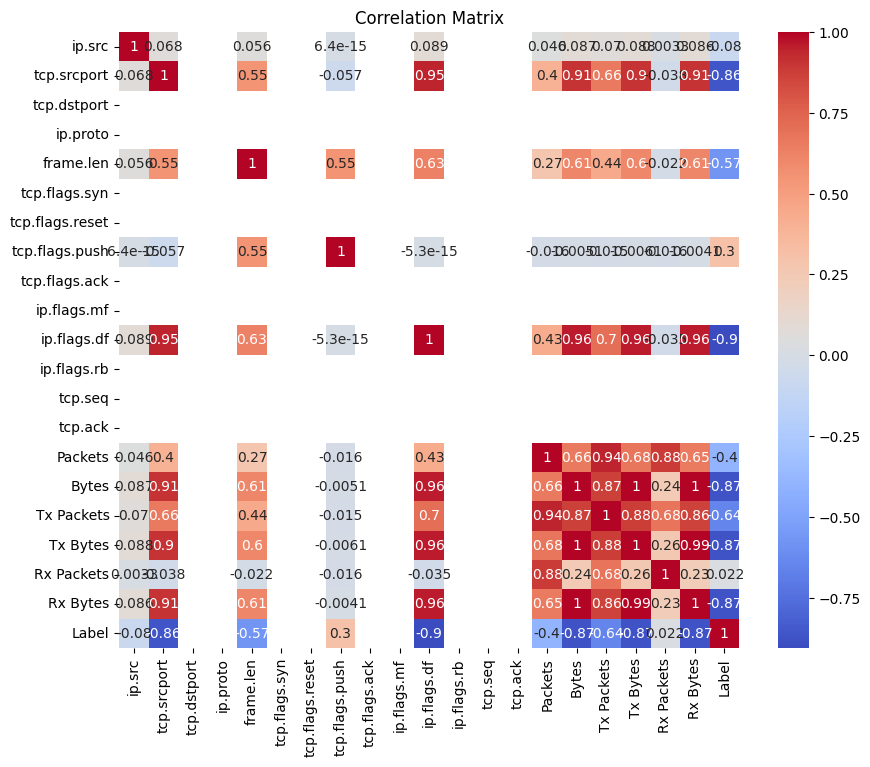

In [ ]:
import seaborn as sns
corr_matrix = ddosdata.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

on remarque que correlation entre bytes et tx_bytes et rx_bytes = 1 donc on peut garder qu' une colonne

In [ ]:
ddosdata.drop(['Tx Bytes','Rx Bytes'],axis='columns', inplace=True)


In [ ]:
ddosdata.columns

Index(['ip.src', 'tcp.srcport', 'tcp.dstport', 'ip.proto', 'frame.len',
       'tcp.flags.syn', 'tcp.flags.reset', 'tcp.flags.push', 'tcp.flags.ack',
       'ip.flags.mf', 'ip.flags.df', 'ip.flags.rb', 'tcp.seq', 'tcp.ack',
       'frame.time', 'Packets', 'Bytes', 'Tx Packets', 'Rx Packets', 'Label'],
      dtype='object')

# creation du modele



In [ ]:
ddosdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151200 entries, 0 to 151199
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype                      
---  ------           --------------   -----                      
 0   ip.src           151200 non-null  int64                      
 1   tcp.srcport      151200 non-null  float64                    
 2   tcp.dstport      151200 non-null  int64                      
 3   ip.proto         151200 non-null  int64                      
 4   frame.len        151200 non-null  float64                    
 5   tcp.flags.syn    151200 non-null  int64                      
 6   tcp.flags.reset  151200 non-null  int64                      
 7   tcp.flags.push   151200 non-null  int64                      
 8   tcp.flags.ack    151200 non-null  int64                      
 9   ip.flags.mf      151200 non-null  int64                      
 10  ip.flags.df      151200 non-null  int64                      
 11  ip.flags.rb  

In [ ]:
columns_to_convert=[col for col in ddosdata.columns if ddosdata[col].dtype == 'int64']
columns_to_convert

['ip.src',
 'tcp.dstport',
 'ip.proto',
 'tcp.flags.syn',
 'tcp.flags.reset',
 'tcp.flags.push',
 'tcp.flags.ack',
 'ip.flags.mf',
 'ip.flags.df',
 'ip.flags.rb',
 'tcp.seq',
 'tcp.ack',
 'Label']

In [ ]:
ddosdata[columns_to_convert] = ddosdata[columns_to_convert].astype('float')


In [ ]:
ddosdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151200 entries, 0 to 151199
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype                      
---  ------           --------------   -----                      
 0   ip.src           151200 non-null  float64                    
 1   tcp.srcport      151200 non-null  float64                    
 2   tcp.dstport      151200 non-null  float64                    
 3   ip.proto         151200 non-null  float64                    
 4   frame.len        151200 non-null  float64                    
 5   tcp.flags.syn    151200 non-null  float64                    
 6   tcp.flags.reset  151200 non-null  float64                    
 7   tcp.flags.push   151200 non-null  float64                    
 8   tcp.flags.ack    151200 non-null  float64                    
 9   ip.flags.mf      151200 non-null  float64                    
 10  ip.flags.df      151200 non-null  float64                    
 11  ip.flags.rb  

In [ ]:
columns_to_convert=[col for col in ddosdata.columns if ddosdata[col].dtype == 'float64']
ddosdata[columns_to_convert] = ddosdata[columns_to_convert].astype('float32')

# test train split

In [ ]:
X = ddosdata.drop('Label',axis='columns')
y = ddosdata['Label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(120960, 19)

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(19,)),  # Input layer with 20 features
    layers.Dense(1, activation='softmax')  # Output layer with 3 neurons for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                200       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(1, activation='softmax')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_traint, y_train, epochs=10)